# Imports

In [65]:

import networkx as nx
import matplotlib.pyplot as plt

topology_dir = "C:/Users/bbenc/Documents/NETWORKZ/cloud_work/src/"

G = nx.read_gml(topology_dir+"26_usa.gml")



In [ ]:
# Get the number of nodes and edges in the network
num_nodes = len(graph.nodes())
num_edges = len(graph.edges())

# Calculate the average degree of the network
avg_degree = sum(dict(graph.degree()).values()) / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree}")

graph.edges()


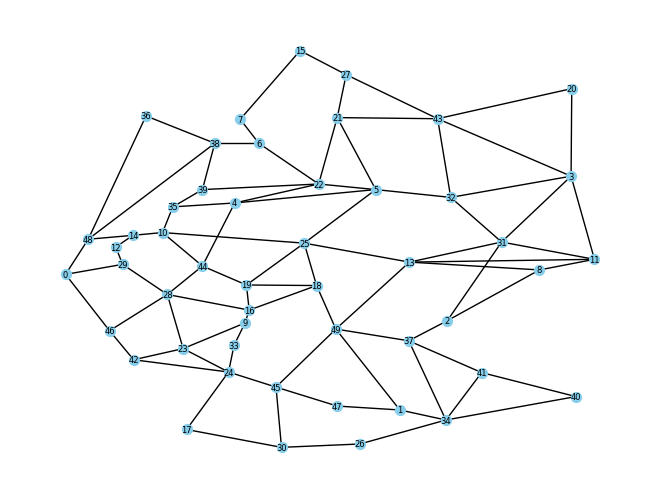

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

topology_dir = "C:/Users/bbenc/Documents/NETWORKZ/cloud_work/src/"

# Load the graph from the GML file
graph = nx.read_gml(topology_dir + "50_germany.gml")

# Retrieve node positions from the 'Longitude' and 'Latitude' attributes
pos = {node_id: (data['Longitude'], data['Latitude']) for node_id, data in graph.nodes(data=True)}

# Create a basic network visualization
nx.draw(graph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=6)

# Display the visualization
plt.show()


In [72]:
## UTILS AND METHODS
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_players(num_players=10, random_range=100):
    players = {}
    for i in range(num_players):
        player_name = f"P{i+1}"
        x = random.uniform(0, random_range)
        y = random.uniform(0, random_range)
        players[player_name] = (x, y)
    return players


def generate_servers():
    # Prediktív szerverek pozíciói
    servers = {
        "S1": (0, 0),
        "S2": (50, 50),
        "S3": (100, 100)
    }
    return servers


def connect_player_to_server(player, servers, G):
    player_position = players[player]
    
    # Legközelebbi szerver kiválasztása
    closest_server = min(servers, key=lambda server: abs(player_position[0] - servers[server][0]) + abs(player_position[1] - servers[server][1]))
    
    # Él hozzáadása a játékos és a legközelebbi szerver között
    distance = abs(player_position[0] - servers[closest_server][0]) + abs(player_position[1] - servers[closest_server][1])
    G.add_edge(player, closest_server, weight=distance)
    
    return G


def draw_graph(G, pos=pos, canvas_size=(10, 8), node_size=200, show_edge_labels=False):
    plt.figure(figsize=canvas_size)
    
    # Szerverek kirajzolása
    nx.draw_networkx_nodes(G, pos, nodelist=servers.keys(), node_color='b', node_size=2.5*node_size, label="Servers")
    # Játékosok kirajzolása
    nx.draw_networkx_nodes(G, pos, nodelist=players.keys(), node_color='g', node_size=node_size, label="Players")

    # Élek kirajzolása
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)

    # Él súlyok (távolságok) hozzáadása
    if show_edge_labels:
        edge_labels = {(player, server): G[player][server]["weight"] for player, server in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Címkék hozzáadása a csomópontokhoz
    node_labels = {node: node for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=node_labels)

    # Kirajzolás beállításai
    plt.title("Szerverek és Játékosok")
    plt.show()


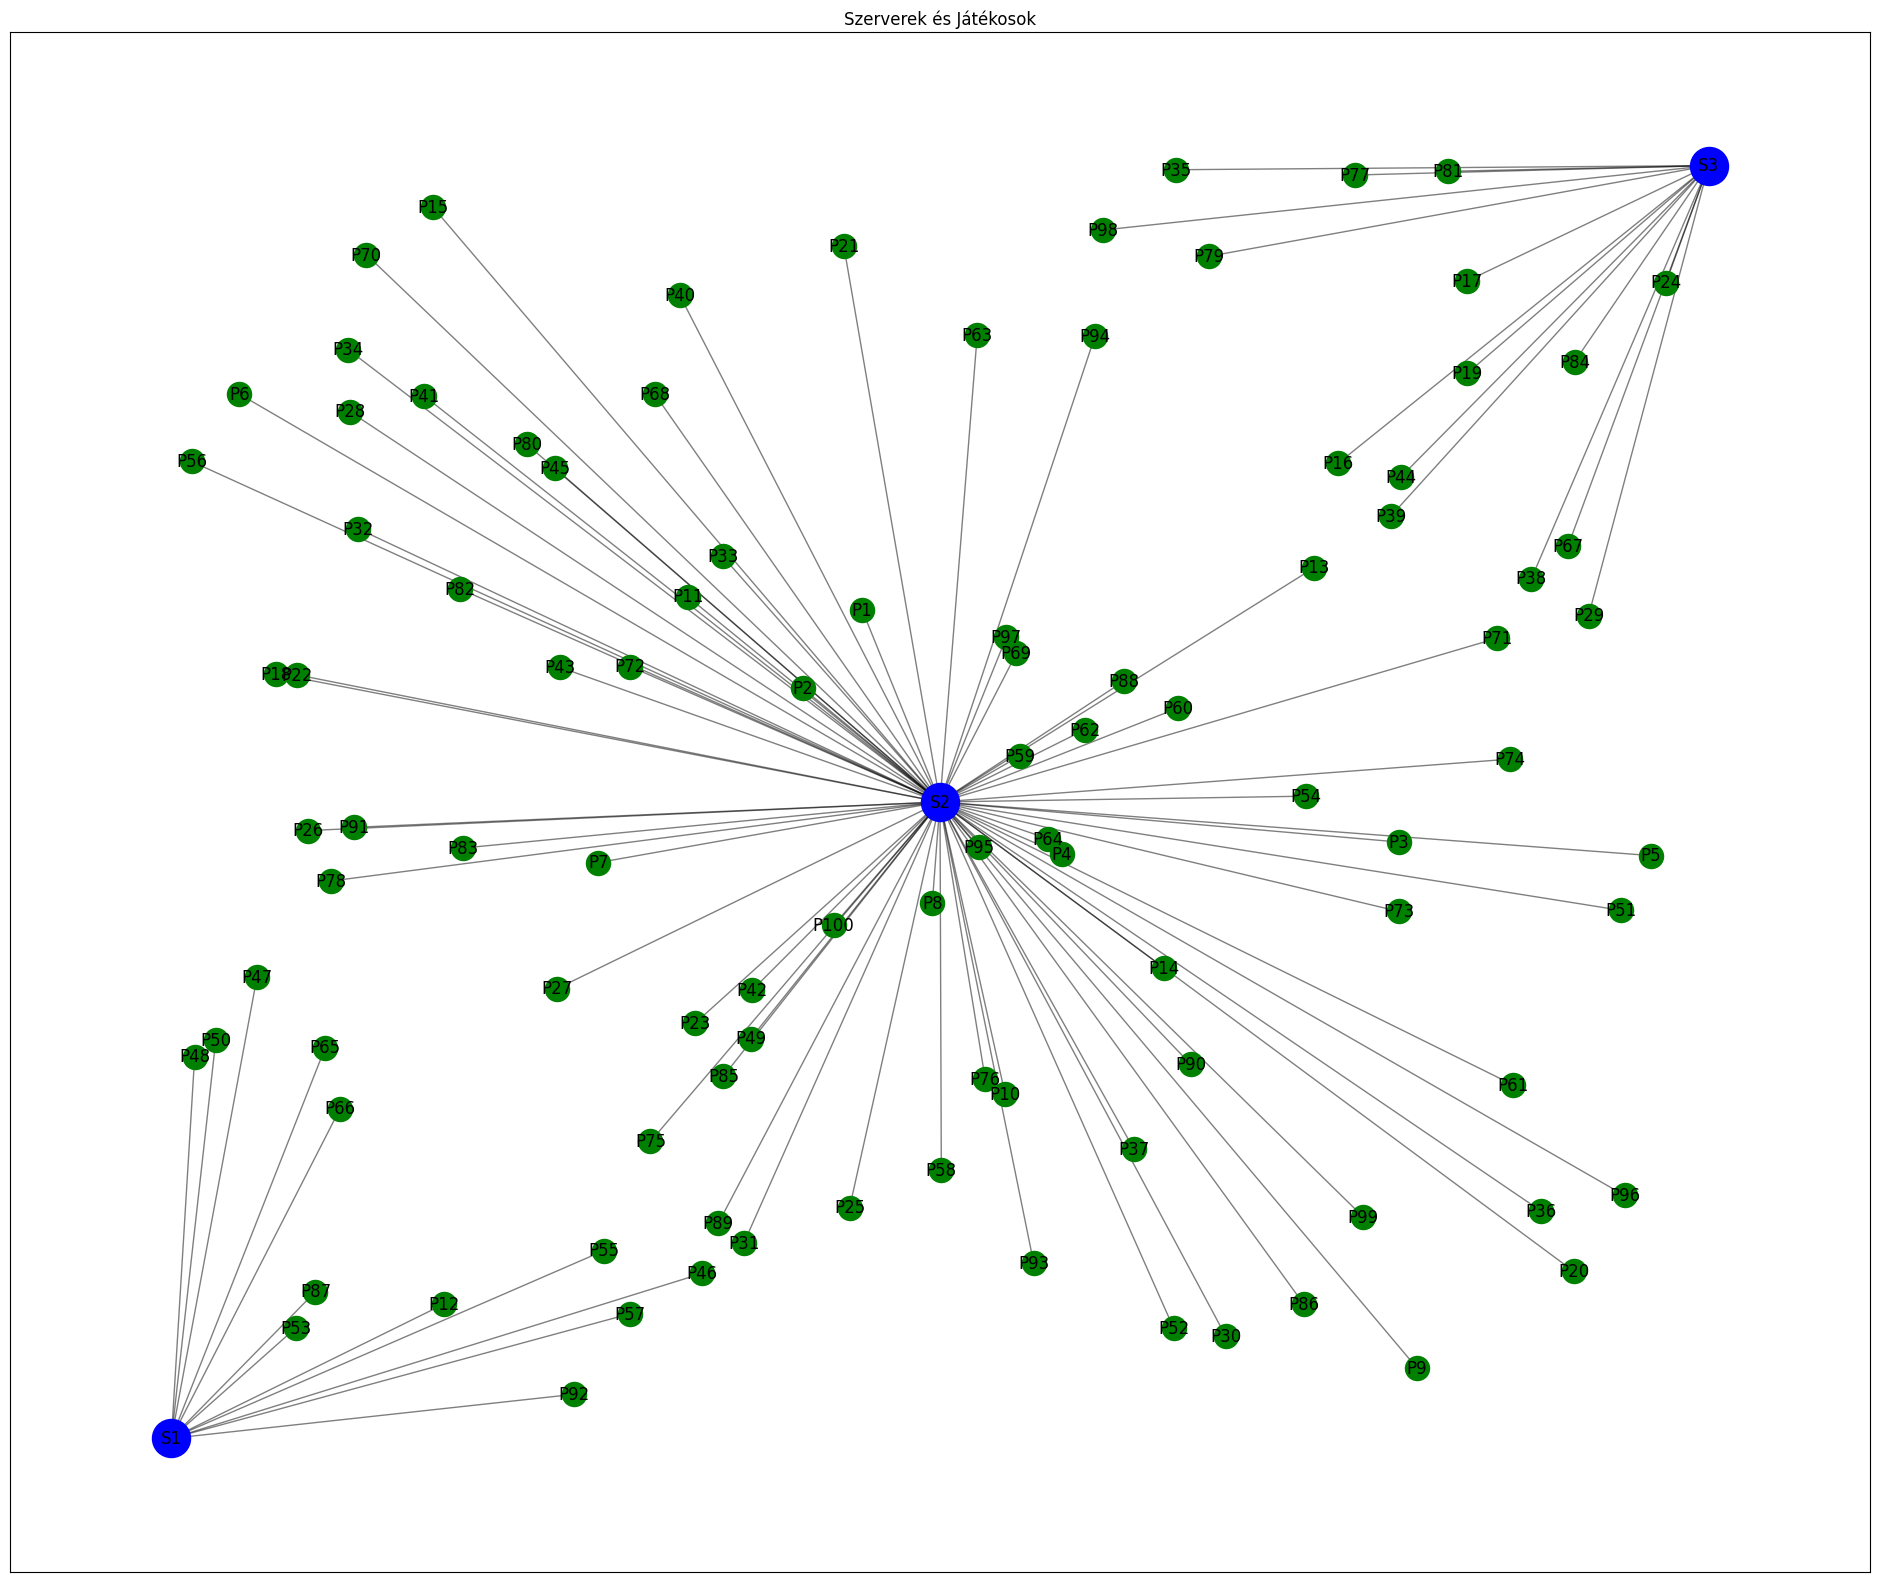

In [64]:
# Játékosok pozícióinak generálása
num_players = 100
random_range = 100
players = generate_players(num_players, random_range)

servers = generate_servers()

# Gráf létrehozása és pozíciók hozzáadása
G = nx.Graph()
G.add_nodes_from(servers.keys())
G.add_nodes_from(players.keys())

# Játékosok összekapcsolása a legközelebbi szerverekkel
for player in players:
    G = connect_player_to_server(player, servers, G)

# Pozíció információk előkészítése és gráf kirajzolása
pos = {**servers, **players}
draw_graph(G, pos, canvas_size=(24, 20), node_size=300, show_edge_labels=False)

In [71]:
# Adding server nodes
G = nx.read_gml(topology_dir+"26_usa.gml")

# Adding player
num_players = 100
random_range = 100
players = generate_players(num_players, random_range)




TypeError: 'int' object is not callable